In [1]:
from src.RBF import RBFNet
from src.ES import ES
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
import xlrd
import csv

MARKERS = ['s', 'o', 'd', 'X', 'P', '8']
COLORS = ['r', 'g', 'b', 'c', 'm', 'y']

In [2]:
points = np.loadtxt('5clstrain1500.csv', delimiter=',')
m = points.shape[0] # rows
n = points.shape[1] - 1 # features
X = points[:, :n]
y = points[:, n:]
y[y == 1] = 0
y[y == 2] = 1
y[y == 3] = 2
y[y == 4] = 3
y[y == 5] = 4
X = preprocessing.scale(X)


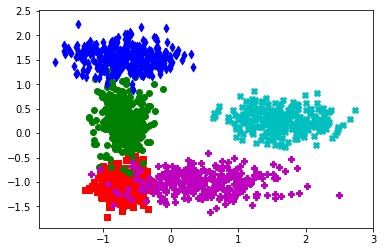

In [3]:
for i in range(m): 
    a = X[i][0]
    b = X[i][1]
    cls = int(y[i][0])
    plt.scatter(a, b, marker=MARKERS[cls], color=COLORS[cls])
plt.show()

In [4]:
es = ES(X=X, y=y, MU=7, LAMBDA=49, ngen=20, circles=6, problem='classification')
my_rbf = es.train()

start training
gen	nevals	avg    	std     	min    	max    
0  	7     	8.27952	0.733063	7.48155	9.60238
1  	49    	9.27192	1.01808 	7.85433	11.3821
2  	49    	8.09387	0.369433	7.64029	8.66253
3  	49    	7.97234	0.317249	7.70891	8.71239
4  	49    	7.8603 	0.187926	7.78211	8.32062
5  	49    	7.83073	0.140766	7.64562	8.05058
6  	49    	7.73826	0.0585702	7.64562	7.85229
7  	49    	7.61841	0.136205 	7.29536	7.726  
8  	49    	7.63074	0.0384112	7.53668	7.64846
9  	49    	7.64596	0.000677371	7.64562	7.6476 
10 	49    	7.64585	0.000562675	7.64562	7.64722
11 	49    	7.64564	6.40435e-05	7.64562	7.6458 
12 	49    	7.64562	8.36626e-06	7.64562	7.64564
13 	49    	7.64562	1.10824e-05	7.64561	7.64565
14 	49    	7.64561	2.90674e-07	7.64561	7.64562
15 	49    	7.64561	2.91921e-07	7.64561	7.64562
16 	49    	7.64561	5.70708e-08	7.64561	7.64561
17 	49    	7.64561	3.37101e-08	7.64561	7.64561
18 	49    	7.64561	1.7866e-08 	7.64561	7.64561
19 	49    	7.64561	9.51339e-09	7.64561	7.64561
20 	49    	7.64561	9.6867

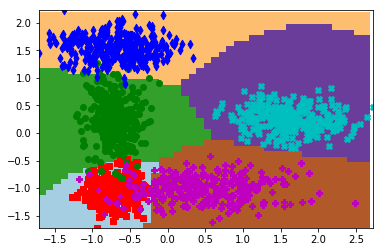

In [5]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
x_range = np.arange(x_min, x_max, 0.1)
y_range = np.arange(y_min, y_max, 0.1)
xx, yy = np.meshgrid(x_range, y_range)
cmap = plt.get_cmap('Paired')
zz = np.zeros(xx.shape)

for i in range(zz.shape[0]):
    for j in range(zz.shape[1]):
        x_vector = np.array([xx[i][j], yy[i][j]])
        network_answer = my_rbf.apply_network(x_vector)
        cls = np.argmax(network_answer)
        zz[i][j] = int(cls)

plt.pcolormesh(xx, yy, zz, cmap=cmap)

for i in range(m): 
    a = X[i][0]
    b = X[i][1]
    cls = int(y[i][0])
    plt.scatter(a, b, marker=MARKERS[cls], color=COLORS[cls])
plt.show()

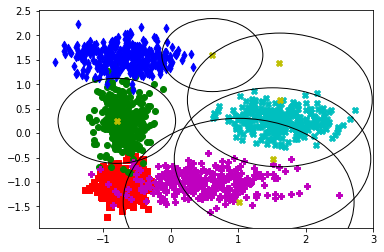

In [15]:
fig, ax = plt.subplots()
for i in range(X.shape[0]): 
    a = X[i][0]
    b = X[i][1]
    cls = int(y[i][0])
    plt.scatter(a, b, marker=MARKERS[cls], color=COLORS[cls])
for v in my_rbf.V: 
    plt.scatter(v[0], v[1], marker=MARKERS[-3], color=COLORS[-1])
    
V = my_rbf.V
gamma = my_rbf.gamma
for k in range(gamma.shape[0]):
    c1 = V[k][0]
    c2 = V[k][1]
    r = gamma[k][0] * 10
    cir = plt.Circle((c1, c2), r, facecolor="None", edgecolor="k")
    ax.add_artist(cir)
plt.show()
plt.show()

In [7]:
dataset_size = X.shape[0]
correct = 0
for i in range(dataset_size): 
    actual_class = int(y[i][0])
    predicted_class = int(np.argmax(my_rbf.apply_network(X[i])))
    if actual_class == predicted_class:
        correct += 1
print('Training Accuracy: %{0}'.format(100 * correct / dataset_size))

Training Accuracy: %96.0


In [8]:
test_points = np.loadtxt('5clstest5000.csv', delimiter=',')
m_test = test_points.shape[0]
n_test = test_points.shape[1] - 1
X_test = test_points[:, :n]
y_test = test_points[:, n:]
y_test[y_test == 1] = 0
y_test[y_test == 2] = 1
y_test[y_test == 3] = 2
y_test[y_test == 4] = 3
y_test[y_test == 5] = 4
X_test = preprocessing.scale(X_test)

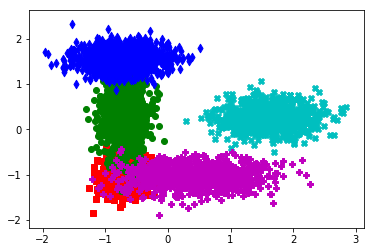

In [9]:
for i in range(m_test): 
    a = X_test[i][0]
    b = X_test[i][1]
    cls = int(y_test[i][0])
    plt.scatter(a, b, marker=MARKERS[cls], color=COLORS[cls])
plt.show()

In [10]:
test_size = m_test
correct = 0
for i in range(test_size): 
    actual_class = int(y_test[i][0])
    predicted_class = int(np.argmax(my_rbf.apply_network(X_test[i])))
    if actual_class == predicted_class:
        correct += 1
print('Test Accuracy: %{0}'.format(100 * correct / test_size))

Test Accuracy: %95.24


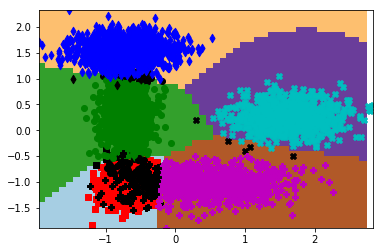

In [11]:
x_min, x_max = X_test[:, 0].min() , X_test[:, 0].max() 
y_min, y_max = X_test[:, 1].min() , X_test[:, 1].max() 
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
x_range = np.arange(x_min, x_max, 0.1)
y_range = np.arange(y_min, y_max, 0.1)
xx, yy = np.meshgrid(x_range, y_range)
cmap = plt.get_cmap('Paired')
zz = np.zeros(xx.shape)

for i in range(zz.shape[0]):
    for j in range(zz.shape[1]):
        x_vector = np.array([xx[i][j], yy[i][j]])
        network_answer = my_rbf.apply_network(x_vector)
        cls = np.argmax(network_answer)
        zz[i][j] = int(cls)

plt.pcolormesh(xx, yy, zz, cmap=cmap)



test_size = m_test
correct = 0
for i in range(m_test): 
    actual_class = int(y_test[i][0])
    predicted_class = int(np.argmax(my_rbf.apply_network(X_test[i])))
    
    a = X_test[i][0]
    b = X_test[i][1]
    
    if actual_class != predicted_class:
        plt.scatter(a, b, marker=MARKERS[actual_class], color='k')

    else:
        plt.scatter(a, b, marker=MARKERS[actual_class], color=COLORS[actual_class])

        